in this notebook, i will do same work with what i dud in the loan prediction 1 notebook, with little changes : i will try log transformation to see if that will affect our results positively .

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("/content/train_loan.csv")

In [28]:
df= df.drop("Loan_ID",axis=1)

In [29]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [30]:
isna =df.isna().sum()
cat=df.select_dtypes(include=object).columns
num= df.select_dtypes(include=np.number).columns
cat_missing = [x for x in cat if isna[x]>0]
num_m = [x for x in num if isna[x]>0]
for x in num_m:
  df[x]=df[x].fillna(df[x].mean( ))
for c in cat_missing:
  df[c]=df[c].fillna(df[c].mode()[0])


In [31]:
df.isna().any().sum()

0

# Log Transformation
we will see if log transformation will improve our results

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


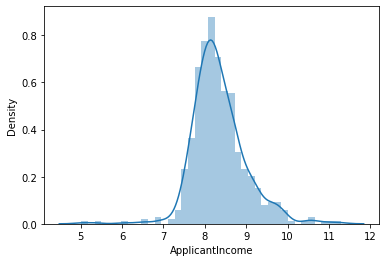

In [32]:
# apply log transformation to the attribute
df['ApplicantIncome'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df["ApplicantIncome"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


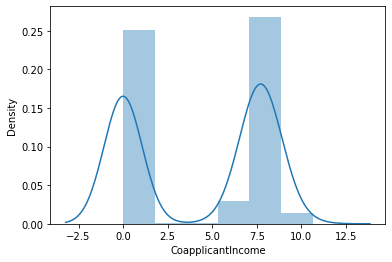

In [33]:
df['CoapplicantIncome'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df["CoapplicantIncome"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


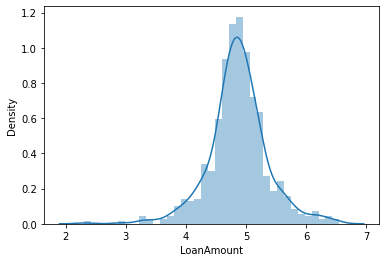

In [34]:
df['LoanAmount'] = np.log(df['LoanAmount']+1)
sns.distplot(df["LoanAmount"])

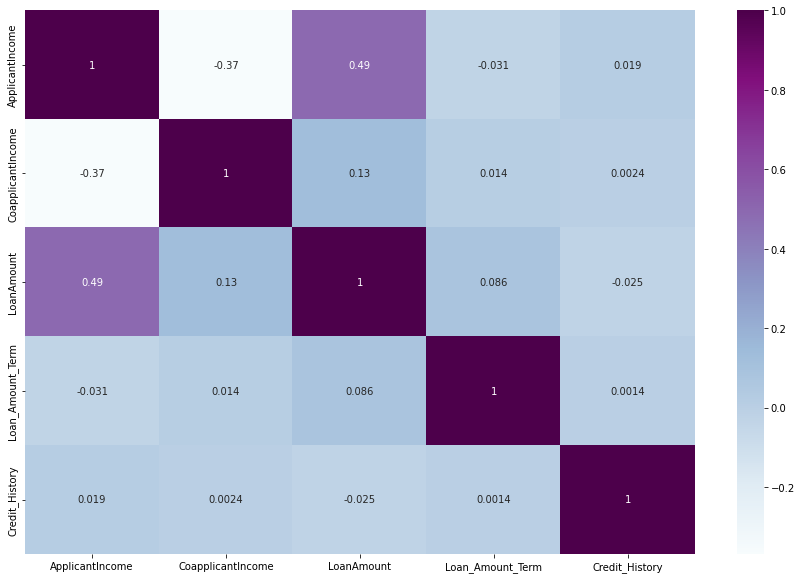

In [35]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [36]:
y=df['Loan_Status']
x=df.drop('Loan_Status',axis=1)
cat=x.select_dtypes(include=object).columns

#converting categorical variables into numerics

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(drop='first'), cat)], remainder='passthrough')
data = columnTransformer.fit_transform(x)
column_name = columnTransformer.get_feature_names()
data1 =  pd.DataFrame(data, columns= column_name)
data1.head(2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,encoder__x0_Male,encoder__x1_Yes,encoder__x2_1,encoder__x2_2,encoder__x2_3+,encoder__x3_Not Graduate,encoder__x4_Yes,encoder__x5_Semiurban,encoder__x5_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.674197,0.000000,4.993232,360.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.430327,7.319202,4.859812,360.0,1.0


# scaling the data now (for numeric features)


In [38]:
from sklearn.preprocessing import StandardScaler
sub = data1[num]
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(sub), columns=sub.columns)
data1 =data1.drop(num,axis =1)
data2 =  pd.concat([data1, X], axis=1)
data2.head(3)

,encoder__x0_Male,encoder__x1_Yes,encoder__x2_1,encoder__x2_2,encoder__x2_3+,encoder__x3_Not Graduate,encoder__x4_Yes,encoder__x5_Semiurban,encoder__x5_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.516186,-1.107783,0.249219,0.279851,0.45164
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.137806,0.782158,-0.022525,0.279851,0.45164
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.519479,-1.107783,-1.356846,0.279851,0.45164


#Train-Test Split


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data2, y, test_size=0.25, random_state=42,stratify=y)

Text(0.5, 15.0, 'Predicted label')

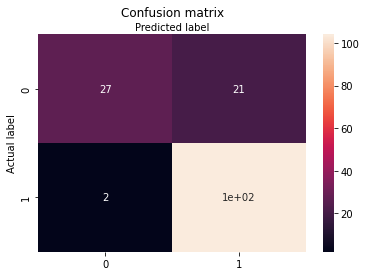

In [42]:
from sklearn import svm
model = svm.SVC()
model.fit(x_train, y_train)
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(cm, annot=True)
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1,max_depth = 6, max_features = 0.25, n_estimators= 80)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, max_features=0.25, n_estimators=80,
                       n_jobs=-1, random_state=42)

In [45]:
pred = rf.predict(x_test)

Text(0.5, 15.0, 'Predicted label')

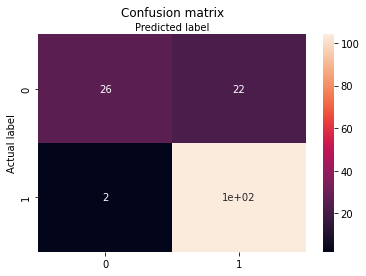

In [46]:
cm = confusion_matrix(y_test, pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(cm, annot=True)
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

we got the same result, with random forest, and almost the same with svm.

log transformation maintly done for svm, o need to log trans or one hot encoding with random forest as we know.

conclusion of this notebook N 2 : log trans had no impact on our results